# **1. Perkenalan Dataset**

1. **Sumber Dataset**:  
   - Dataset yang saya peroleh adalah dataset yang bersumber dari *Kaggle*
   
2. **Ketentuan Dataset**

   - Data set ini tidak memiliki label dan juga jumlahnya cukup besar yakni 26.052 baris dan 7 kolom sehingga memenuhi syarat **1000 baris**
   - Dataset ini mengandung data *Kategorikal* dan *Numerik*
        - Kategorikal : *City*, *Card Type*, *Gender*
        - Numerik : *Amount*

# **2. Import Library**

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# **3. Loading Data**

In [226]:
df = pd.read_csv("data/Data_inisiasi.csv")
df.head()

,index,City,Date,Card Type,Exp Type,Gender,Amount
0,0,"Delhi, India",29-Oct-14,Gold,Bills,F,82475
1,1,"Greater Mumbai, India",22-Aug-14,Platinum,Bills,F,32555
2,2,"Bengaluru, India",27-Aug-14,Silver,Bills,F,101738
3,3,"Greater Mumbai, India",12-Apr-14,Signature,Bills,F,123424
4,4,"Bengaluru, India",5-May-15,Gold,Bills,F,171574


In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26052 entries, 0 to 26051
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      26052 non-null  int64 
 1   City       26052 non-null  object
 2   Date       26052 non-null  object
 3   Card Type  26052 non-null  object
 4   Exp Type   26052 non-null  object
 5   Gender     26052 non-null  object
 6   Amount     26052 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 1.4+ MB


Dataset ini memiliki 26.052 baris dan 7 kolom, yaitu:

- **City** (kategorikal) → Kota transaksi<br>
- **Date** (tanggal) → Waktu transaksi<br>
- **Card Type** (kategorikal) → Jenis kartu kredit (Gold, Platinum, dll.)<br>
- **Exp Type** (kategorikal) → Jenis pengeluaran (Bills, dll.)<br>
- **Gender** (kategorikal) → Jenis kelamin pengguna<br>
- **Amount** (numerikal) → Jumlah transaksi<br>
- **Index** (tidak diperlukan)

**Analisis Awal**
- Jumlah baris cukup besar (26.052), jadi memenuhi syarat minimal **1.000-2500** baris.

Semua kolom memiliki nilai non-null, artinya tidak ada missing values yang perlu ditangani. Dataset ini siap untuk dianalisis lebih lanjut.

In [231]:
df.describe()

,index,Amount
count,26052.000000,26052.000000
mean,13025.500000,156411.537425
std,7520.708943,103063.254287
min,0.000000,1005.000000
25%,6512.750000,77120.250000
50%,13025.500000,153106.500000
75%,19538.250000,228050.000000
max,26051.000000,998077.000000


**Index**
- kolom index terdiri dari 26052 data dengan nilai rata-rata 13025.
  
**Amount**
- Pendapatan nasabah bervariasi antara 1005 hingga 998077 ribu dolar dengan rata-rata 156411 ribu dolar.<br>
- Sebagian besar pelanggan memiliki pendapatan tahunan antara 77120 hingga 228050 ribu dolar.
  
Dataset ini hanya memiliki 2 data Numerik namun pada kolom index sepertinya tidak diperlukan sehingga akan dihilangkan.

# **4. Exploratory Data Analysis (EDA)**

1. **Memahami Struktur Data**

In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26052 entries, 0 to 26051
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      26052 non-null  int64 
 1   City       26052 non-null  object
 2   Date       26052 non-null  object
 3   Card Type  26052 non-null  object
 4   Exp Type   26052 non-null  object
 5   Gender     26052 non-null  object
 6   Amount     26052 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 1.4+ MB


2. **Analisis Distribusi dan Korelasi**  

In [238]:
df_kategorikal = df.select_dtypes(include=['object'])
print(df_kategorikal)

                        City       Date  Card Type Exp Type Gender
0               Delhi, India  29-Oct-14       Gold    Bills      F
1      Greater Mumbai, India  22-Aug-14   Platinum    Bills      F
2           Bengaluru, India  27-Aug-14     Silver    Bills      F
3      Greater Mumbai, India  12-Apr-14  Signature    Bills      F
4           Bengaluru, India   5-May-15       Gold    Bills      F
...                      ...        ...        ...      ...    ...
26047         Kolkata, India  22-Jun-14     Silver   Travel      F
26048            Pune, India   3-Aug-14  Signature   Travel      M
26049       Hyderabad, India  16-Jan-15     Silver   Travel      M
26050          Kanpur, India  14-Sep-14     Silver   Travel      M
26051       Hyderabad, India  19-Oct-13  Signature    Bills      M

[26052 rows x 5 columns]


In [239]:
df_numerik = df.select_dtypes(include=['int'])
print(df_numerik)

       index  Amount
0          0   82475
1          1   32555
2          2  101738
3          3  123424
4          4  171574
...      ...     ...
26047  26047  128191
26048  26048  246316
26049  26049  265019
26050  26050   88174
26051  26051  184410

[26052 rows x 2 columns]


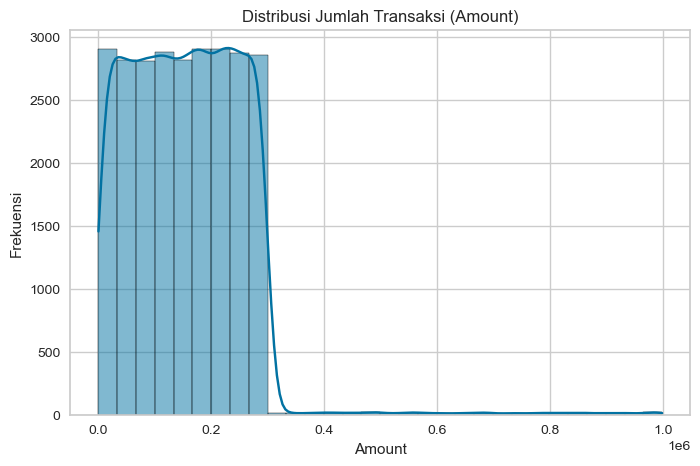

In [240]:
import matplotlib.pyplot as plt
import seaborn as sns

# Konversi kolom Date ke datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce', format='%d-%b-%y')

# Cek distribusi data numerik (Amount)
plt.figure(figsize=(8, 5))
sns.histplot(df['Amount'], bins=30, kde=True)
plt.title("Distribusi Jumlah Transaksi (Amount)")
plt.xlabel("Amount")
plt.ylabel("Frekuensi")
plt.show()

C:\Users\nofen\AppData\Local\Temp\ipykernel_12376\1264262033.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Gender'], y=df['Amount'], ax=axes[0], palette="pastel")
C:\Users\nofen\AppData\Local\Temp\ipykernel_12376\1264262033.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Card Type'], y=df['Amount'], ax=axes[1], palette="pastel")
C:\Users\nofen\AppData\Local\Temp\ipykernel_12376\1264262033.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Exp Type'], y=df['Amount'], ax=axes[2], palette="pastel")


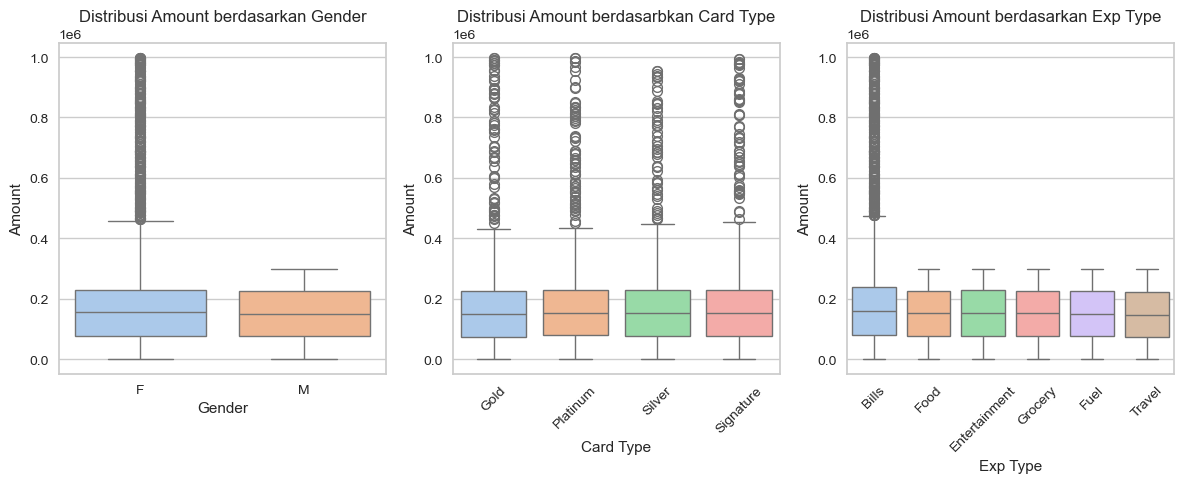

In [244]:
# Boxplot Amount berdasarkan fitur kategorikal
fig, axes = plt.subplots(1, 3, figsize=(12, 5))

sns.boxplot(x=df['Gender'], y=df['Amount'], ax=axes[0], palette="pastel")
axes[0].set_title("Distribusi Amount berdasarkan Gender")

sns.boxplot(x=df['Card Type'], y=df['Amount'], ax=axes[1], palette="pastel")
axes[1].set_title("Distribusi Amount berdasarbkan Card Type")
axes[1].tick_params(axis='x', rotation=45)

sns.boxplot(x=df['Exp Type'], y=df['Amount'], ax=axes[2], palette="pastel")
axes[2].set_title("Distribusi Amount berdasarkan Exp Type")
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

#### Plot boxplot untuk melihat distribusi Amount dan mendeteksi outlier

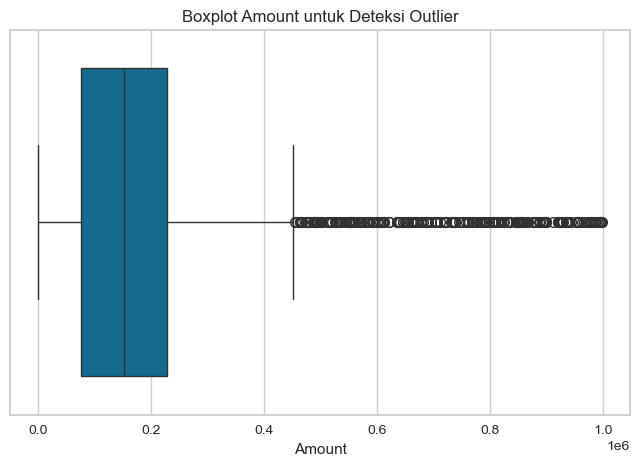

In [246]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Amount'])
plt.title("Boxplot Amount untuk Deteksi Outlier")
plt.show()

3. **Visualisasi Data** 

C:\Users\nofen\AppData\Local\Temp\ipykernel_12376\3309221025.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Gender'], ax=axes[0, 0], palette="pastel")
C:\Users\nofen\AppData\Local\Temp\ipykernel_12376\3309221025.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Card Type'], ax=axes[0, 1], palette="pastel")
C:\Users\nofen\AppData\Local\Temp\ipykernel_12376\3309221025.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Exp Type'], ax=axes[1, 0], palette="pastel")
C:\Users\nofen\AppData\Local\Temp\ipykernel_12376

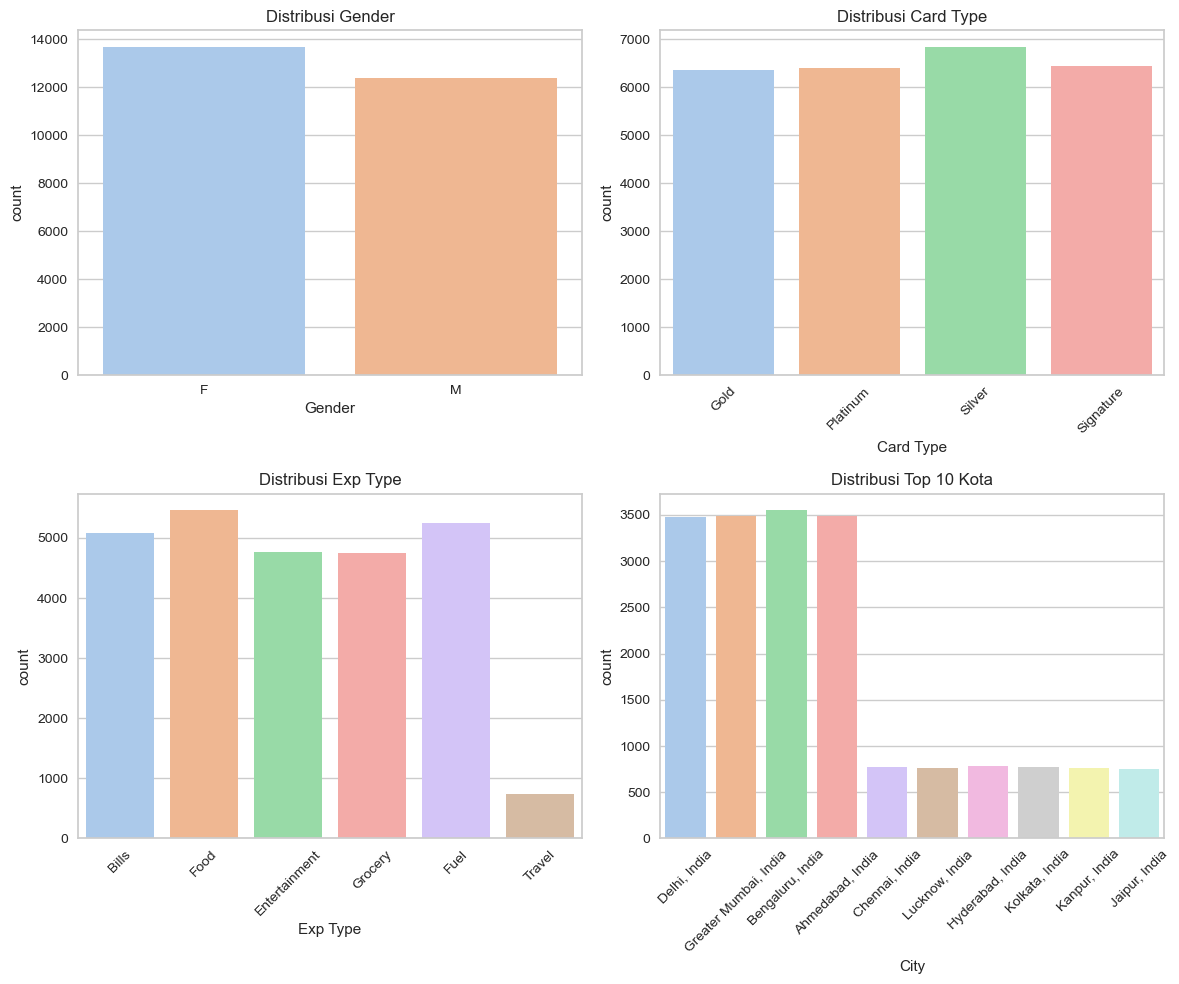

In [248]:
# Plot distribusi untuk fitur kategorikal
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Distribusi Gender
sns.countplot(x=df['Gender'], ax=axes[0, 0], palette="pastel")
axes[0, 0].set_title("Distribusi Gender")

# Distribusi Card Type
sns.countplot(x=df['Card Type'], ax=axes[0, 1], palette="pastel")
axes[0, 1].set_title("Distribusi Card Type")
axes[0, 1].tick_params(axis='x', rotation=45)

# Distribusi Exp Type
sns.countplot(x=df['Exp Type'], ax=axes[1, 0], palette="pastel")
axes[1, 0].set_title("Distribusi Exp Type")
axes[1, 0].tick_params(axis='x', rotation=45)

# Distribusi City (Top 10 kota saja)
top_cities = df['City'].value_counts().nlargest(10).index
sns.countplot(x=df[df['City'].isin(top_cities)]['City'], ax=axes[1, 1], palette="pastel")
axes[1, 1].set_title("Distribusi Top 10 Kota")
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Berikut distribusi fitur kategorikal:

- **Gender**: Ada distribusi yang cukup seimbang.

- **Card Type**: Beberapa jenis kartu lebih dominan.

- **Exp Type**: Tipe pengeluaran bervariasi, ada beberapa kategori yang lebih sering digunakan.

- **City**: Hanya menampilkan 10 kota dengan transaksi terbanyak.

Pengeluaran perempuan melampaui laki-laki, Keti menunjukkan total pengeluaran yang lebih tinggi di antara pengguna perempuan.

#### Presentase Distribusi Berdasarkan Gender

C:\Users\nofen\AppData\Local\Temp\ipykernel_12376\2445731747.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.barplot(x='Gender', y='Amount', data=total_spending, palette='viridis')


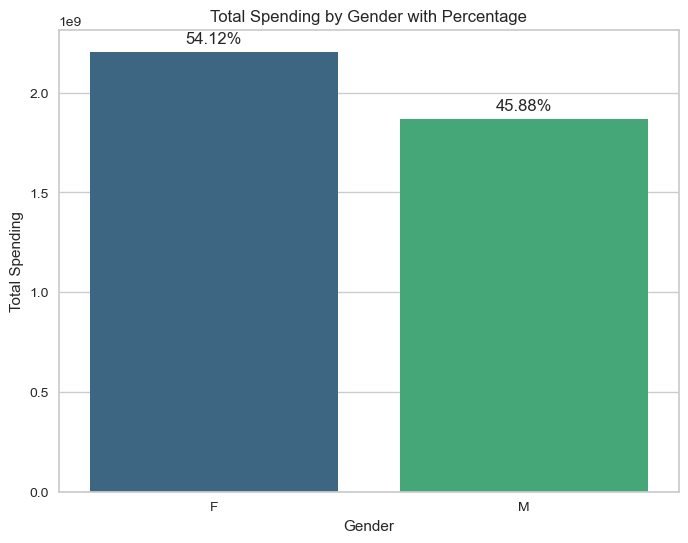

In [251]:
total_spending = df.groupby('Gender')['Amount'].sum().reset_index()
total_spending['Percentage'] = (total_spending['Amount'] / total_spending['Amount'].sum()) * 100
plt.figure(figsize=(8, 6))

plot = sns.barplot(x='Gender', y='Amount', data=total_spending, palette='viridis')
for p, perc in zip(plot.patches, total_spending['Percentage']):
    plot.annotate(f'{perc:.2f}%',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 9),
textcoords='offset points')
plt.title('Total Spending by Gender with Percentage')
plt.xlabel('Gender')
plt.ylabel('Total Spending')
plt.show()

#### Distribusi Total jumlah yang dibelanjakan berdasarkan Card Type

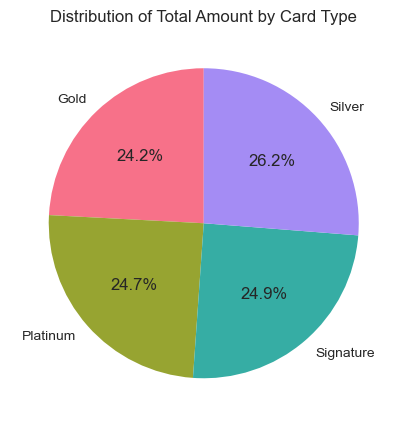

In [253]:
card_type_totals = df.groupby('Card Type')['Amount'].sum()
plt.figure(figsize=(5, 6))
bright_palette = sns.color_palette("husl", len(card_type_totals))
plt.pie(card_type_totals, labels=card_type_totals.index, autopct='%1.1f%%', startangle=90, colors=bright_palette)
plt.title('Distribution of Total Amount by Card Type')
plt.show()

#### Presentase Jumlah yang Dibelanjakan per Jenis Pengeluaran

C:\Users\nofen\AppData\Local\Temp\ipykernel_12376\175090769.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=df, x='Exp Type', y='Amount', estimator=sum, ci=None, palette='viridis')
C:\Users\nofen\AppData\Local\Temp\ipykernel_12376\175090769.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df, x='Exp Type', y='Amount', estimator=sum, ci=None, palette='viridis')


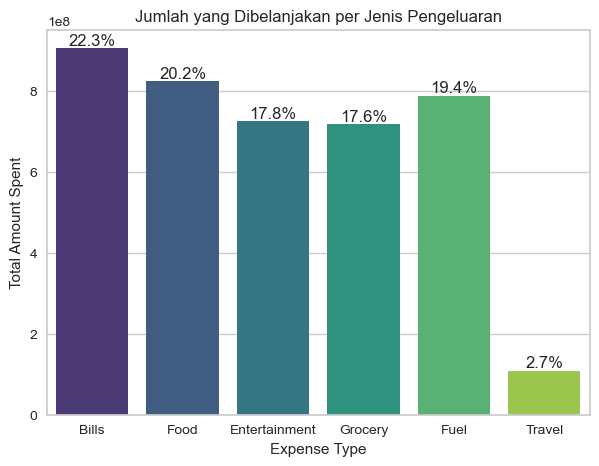

In [255]:
plt.figure(figsize=(7, 5))
ax = sns.barplot(data=df, x='Exp Type', y='Amount', estimator=sum, ci=None, palette='viridis')
total_amount = df['Amount'].sum()
for p in ax.patches:
 height = p.get_height()
 ax.annotate(f'{height/total_amount:.1%}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')
plt.title('Jumlah yang Dibelanjakan per Jenis Pengeluaran')
plt.xlabel('Expense Type')
plt.ylabel('Total Amount Spent')
plt.show()

#### Jumlah total yang dibelanjakan berdasarkanCard Type dan Gender

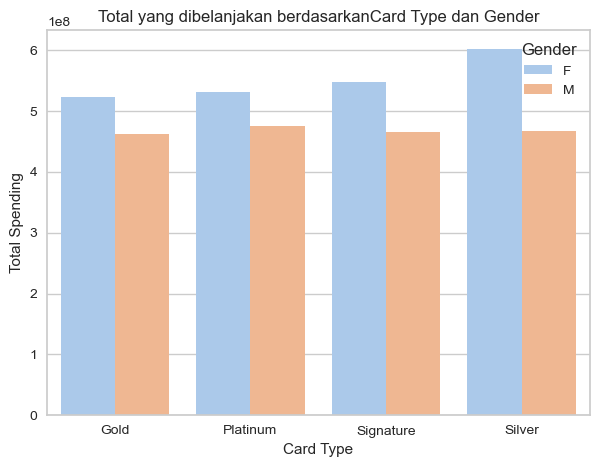

In [258]:
card_gender_totals = df.groupby(['Card Type', 'Gender'])['Amount'].sum().reset_index()
plt.figure(figsize=(7, 5))
sns.barplot(x='Card Type', y='Amount', hue='Gender', data=card_gender_totals, palette='pastel')
plt.title('Total yang dibelanjakan berdasarkanCard Type dan Gender')
plt.xlabel('Card Type')
plt.ylabel('Total Spending')
plt.show()

#### Total Pengeluaran berdasarkan Expense dan Gender

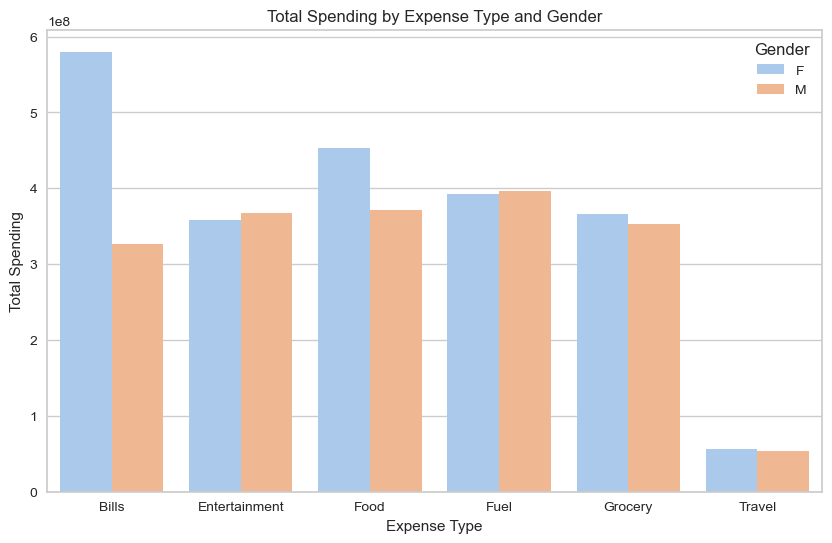

In [260]:
exp_gender_totals = df.groupby(['Exp Type', 'Gender'])['Amount'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Exp Type', y='Amount', hue='Gender', data=exp_gender_totals, palette='pastel')
plt.title('Total Spending by Expense Type and Gender')
plt.xlabel('Expense Type')
plt.ylabel('Total Spending')
plt.show()

#### Tren penggunaan Credit card dari waktu ke waktu

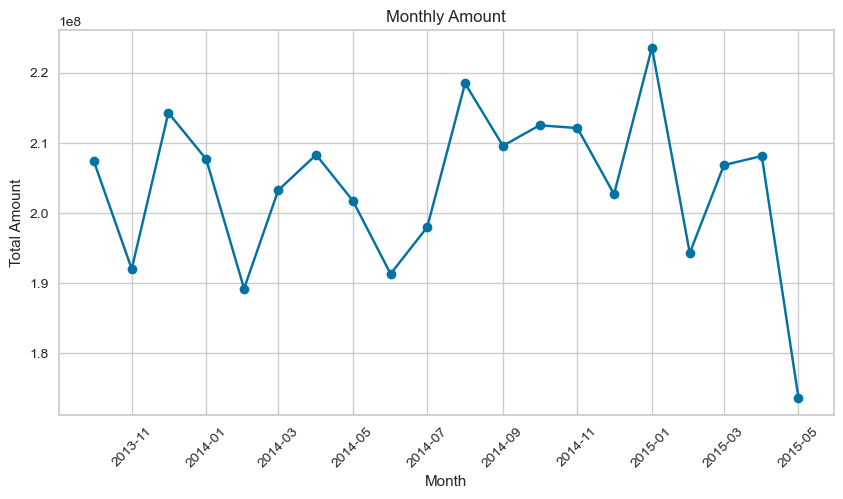

In [262]:
df['Month'] = df['Date'].dt.to_period('M')
df['Amount'] = pd.to_numeric(df['Amount'])
monthly_data = df.groupby('Month')['Amount'].sum().reset_index()
plt.figure(figsize=(10, 5))
plt.plot(monthly_data['Month'].dt.to_timestamp(), monthly_data['Amount'], marker='o', linestyle='-')
plt.title('Monthly Amount')
plt.xlabel('Month')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.show()

In [263]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Ekstrak DayOfWeek (0 = Senin, 6 = Minggu) dan IsWeekend (0 = Hari kerja, 1 = Akhir pekan)
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['IsWeekend'] = (df['DayOfWeek'] >= 5).astype(int)

# Encoding fitur kategorikal
categorical_cols = ['Card Type', 'Exp Type', 'Gender']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Drop kolom 'City' dan 'Date' karena tidak relevan setelah transformasi
df_encoded.drop(columns=['City', 'Date', 'Month'], inplace=True)

# Tampilkan hasil setelah preprocessing
df_encoded.head()

,index,Amount,DayOfWeek,IsWeekend,Card Type_Platinum,Card Type_Signature,Card Type_Silver,Exp Type_Entertainment,Exp Type_Food,Exp Type_Fuel,Exp Type_Grocery,Exp Type_Travel,Gender_M
0,0,82475,2,0,False,False,False,False,False,False,False,False,False
1,1,32555,4,0,True,False,False,False,False,False,False,False,False
2,2,101738,2,0,False,False,True,False,False,False,False,False,False
3,3,123424,5,1,False,True,False,False,False,False,False,False,False
4,4,171574,1,0,False,False,False,False,False,False,False,False,False


In [264]:
df['Month'] = df['Month'].astype(str).str[-2:].astype(int)
df = df.drop(columns=['Date'])

# **5. Data Preprocessing**

#### Normalisasi

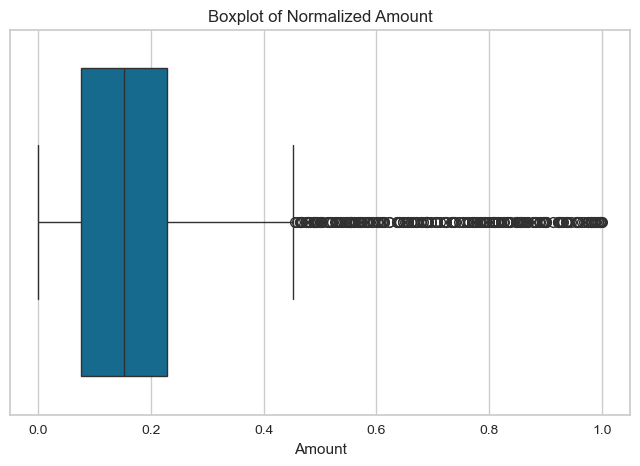

(   index                   City  Card Type Exp Type Gender    Amount  Month  \
 0      0           Delhi, India       Gold    Bills      F  0.081709     10   
 1      1  Greater Mumbai, India   Platinum    Bills      F  0.031643      8   
 2      2       Bengaluru, India     Silver    Bills      F  0.101029      8   
 3      3  Greater Mumbai, India  Signature    Bills      F  0.122778      4   
 4      4       Bengaluru, India       Gold    Bills      F  0.171070      5   
 
    DayOfWeek  IsWeekend  
 0          2          0  
 1          4          0  
 2          2          0  
 3          5          1  
 4          1          0  ,
 Index(['City', 'Card Type', 'Exp Type', 'Gender'], dtype='object'))

In [267]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])

# Visualisasi outlier di 'Amount' menggunakan boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Amount'])
plt.title("Boxplot of Normalized Amount")
plt.show()

# Cek apakah encoding sudah benar (hanya numerik)
non_numeric_cols = df.select_dtypes(exclude=['number']).columns
df.head(), non_numeric_cols

#### Encoding

In [269]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from kmodes.kprototypes import KPrototypes
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import MinMaxScaler
import time

# Pilih fitur yang akan digunakan
selected_features = ["Amount", "Card Type", "Exp Type", "DayOfWeek", "IsWeekend"]
df_selected = df[selected_features].copy()

# Cek apakah ada missing values
missing_values = df_selected.isnull().sum()

# Cek distribusi unik untuk fitur kategorikal
unique_card_types = df_selected["Card Type"].unique()
unique_exp_types = df_selected["Exp Type"].unique()

# Tampilkan ringkasan
missing_values, unique_card_types, unique_exp_types

(Amount       0
 Card Type    0
 Exp Type     0
 DayOfWeek    0
 IsWeekend    0
 dtype: int64,
 array(['Gold', 'Platinum', 'Silver', 'Signature'], dtype=object),
 array(['Bills', 'Food', 'Entertainment', 'Grocery', 'Fuel', 'Travel'],
       dtype=object))

In [270]:
df.dtypes

index          int64
City          object
Card Type     object
Exp Type      object
Gender        object
Amount       float64
Month          int32
DayOfWeek      int32
IsWeekend      int32
dtype: object

In [271]:
# Encoding fitur kategorikal
label_encoders = {}
categorical_columns = ["City", "Card Type", "Exp Type", "Gender"]
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Simpan encoder untuk inversi nanti

In [272]:
df.head()

,index,City,Card Type,Exp Type,Gender,Amount,Month,DayOfWeek,IsWeekend
0,0,126,0,0,0,0.081709,10,2,0
1,1,170,1,0,0,0.031643,8,4,0
2,2,71,3,0,0,0.101029,8,2,0
3,3,170,2,0,0,0.122778,4,5,1
4,4,71,0,0,0,0.171070,5,1,0


In [273]:
df.dtypes

index          int64
City           int32
Card Type      int32
Exp Type       int32
Gender         int32
Amount       float64
Month          int32
DayOfWeek      int32
IsWeekend      int32
dtype: object

#### Penanganan Outlier

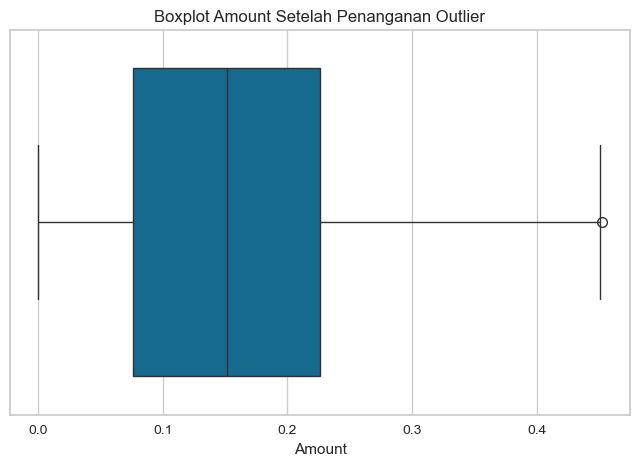

Ukuran DataFrame asli: (26052, 9)
Ukuran DataFrame setelah penghapusan outlier: (25823, 9)


In [275]:
df_original = df.copy()

# Menghitung Q1 (persentil 25) dan Q3 (persentil 75)
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan atas untuk mendeteksi outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menghapus data outlier dan menimpa DataFrame df
df = df[(df['Amount'] >= lower_bound) & (df['Amount'] <= upper_bound)]

# Visualisasi ulang setelah menghapus outlier
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Amount'])
plt.title("Boxplot Amount Setelah Penanganan Outlier")
plt.show()

# Cek jumlah data setelah perubahan
print("Ukuran DataFrame asli:", df_original.shape)
print("Ukuran DataFrame setelah penghapusan outlier:", df.shape)

# Sekarang Anda memiliki salinan DataFrame asli (df_original) dan DataFrame yang telah diubah (df)

# 6. Pembangunan Model Clustering

### I. Pembangunan Model Clustering

##### **(a) Menggunakan Elbow Method**

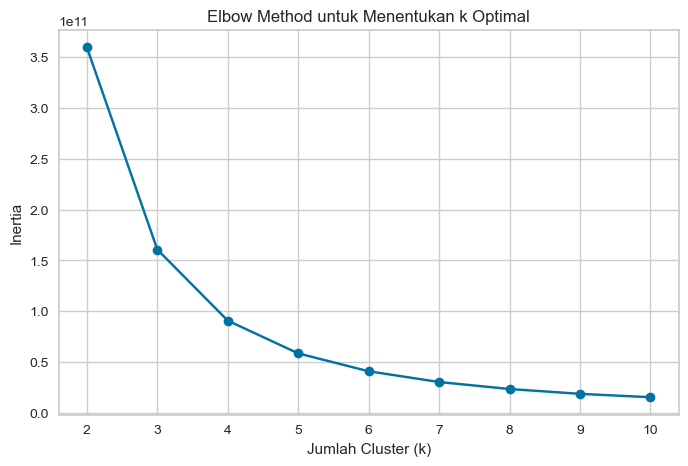

In [279]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Mencari nilai inertia untuk berbagai jumlah cluster
inertia = []
K_range = range(2, 11)  # Coba dari 2 hingga 10 cluster

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker='o', linestyle='-')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method untuk Menentukan k Optimal')
plt.show()

##### **(b) Menggunakan Silhouette Score**

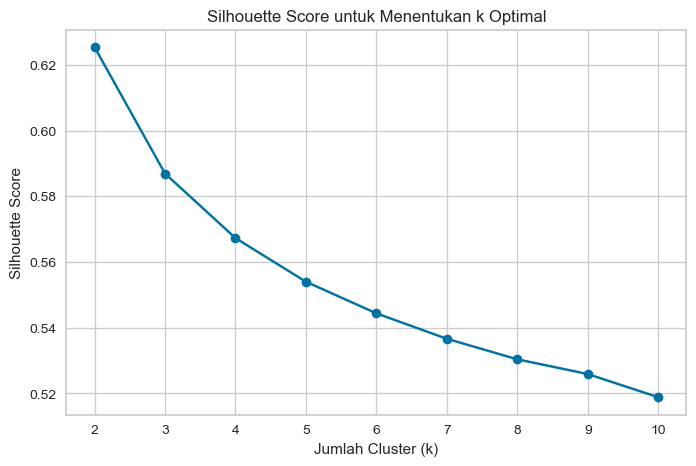

In [281]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(df)
    score = silhouette_score(df, cluster_labels)
    silhouette_scores.append(score)

# Plot Silhouette Score
plt.figure(figsize=(8,5))
plt.plot(K_range, silhouette_scores, marker='o', linestyle='-')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score untuk Menentukan k Optimal')
plt.show()

### Clustering dengan K-Means

In [283]:
# Gunakan k optimal yang didapatkan dari metode di atas (misal k=4)
optimal_k = 4  

# Inisialisasi dan fit model K-Means
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster_KMeans'] = kmeans.fit_predict(df)

# Menampilkan jumlah data di tiap cluster
df['Cluster_KMeans'].value_counts()

Cluster_KMeans
0    6517
2    6491
3    6422
1    6393
Name: count, dtype: int64

### Clustering dengan K-Prototypes 

In [285]:
from kmodes.kprototypes import KPrototypes

# Konversi data ke numpy array
df_array = df.to_numpy()

# Inisialisasi dan fit model K-Prototypes
kproto = KPrototypes(n_clusters=optimal_k, random_state=42)
df['Cluster_KPrototypes'] = kproto.fit_predict(df_array, categorical=[0,1,2])  # Sesuaikan index kategori

# Menampilkan jumlah data di tiap cluster
df['Cluster_KPrototypes'].value_counts()

Cluster_KPrototypes
0    7932
2    6737
1    5972
3    5182
Name: count, dtype: int64

In [286]:
from kmodes.kprototypes import KPrototypes
import numpy as np

# Jumlah cluster optimal (misalnya k=4, sesuaikan dengan hasil Elbow/Silhouette)
optimal_k = 4  
X_numeric = df[['Amount', 'Month', 'DayOfWeek', 'IsWeekend']]

# K-Means (untuk data numerik)
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster_KMeans'] = kmeans.fit_predict(X_numeric)

# K-Prototypes (untuk data numerik + kategorikal)
X_mixed = df.drop(columns=['index'])  # Hapus indeks karena tidak perlu
categorical_columns = [0, 1, 2, 3]  # Sesuaikan indeks kolom kategori dalam array
X_mixed_array = X_mixed.to_numpy()

kproto = KPrototypes(n_clusters=optimal_k, random_state=42)
df['Cluster_KPrototypes'] = kproto.fit_predict(X_mixed_array, categorical=categorical_columns)

# Cek jumlah anggota per cluster
print(df['Cluster_KMeans'].value_counts())
print(df['Cluster_KPrototypes'].value_counts())

Cluster_KMeans
2    7932
3    6846
0    5972
1    5073
Name: count, dtype: int64
Cluster_KPrototypes
1    7932
3    6846
2    5972
0    5073
Name: count, dtype: int64


In [287]:
df.head()

,index,City,Card Type,Exp Type,Gender,Amount,Month,DayOfWeek,IsWeekend,Cluster_KMeans,Cluster_KPrototypes
0,0,126,0,0,0,0.081709,10,2,0,1,0
1,1,170,1,0,0,0.031643,8,4,0,3,3
2,2,71,3,0,0,0.101029,8,2,0,1,0
3,3,170,2,0,0,0.122778,4,5,1,0,2
4,4,71,0,0,0,0.171070,5,1,0,2,1


### II. Evaluasi Clustering

In [289]:
# Evaluasi Silhouette Score
silhouette_kmeans = silhouette_score(df, df['Cluster_KMeans'])
silhouette_kproto = silhouette_score(df, df['Cluster_KPrototypes'])

print(f"Silhouette Score K-Means: {silhouette_kmeans:.4f}")
print(f"Silhouette Score K-Prototypes: {silhouette_kproto:.4f}")

Silhouette Score K-Means: -0.0044
Silhouette Score K-Prototypes: -0.0044


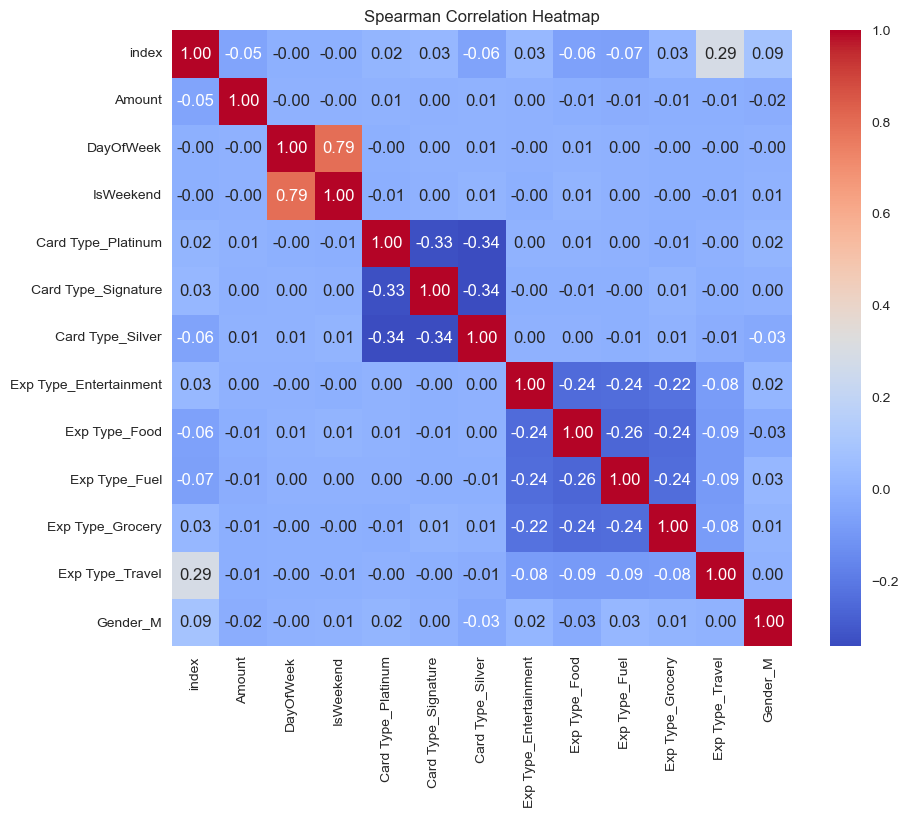

Amount                    1.135106
index                     0.047454
Gender_M                  0.011252
Exp Type_Entertainment    0.001770
DayOfWeek                 0.000206
IsWeekend                 0.000000
Card Type_Platinum        0.000000
Card Type_Signature       0.000000
Card Type_Silver          0.000000
Exp Type_Food             0.000000
Exp Type_Fuel             0.000000
Exp Type_Grocery          0.000000
Exp Type_Travel           0.000000
dtype: float64

In [290]:
from sklearn.feature_selection import VarianceThreshold, mutual_info_classif
from scipy.stats import spearmanr

# 1. Cek korelasi antar fitur
plt.figure(figsize=(10, 8))
sns.heatmap(df_encoded.corr(method='spearman'), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Spearman Correlation Heatmap")
plt.show()

# 2. Variance Threshold untuk fitur dengan variansi rendah
selector = VarianceThreshold(threshold=0.01)
df_high_variance = df_encoded.loc[:, selector.fit(df_encoded).get_support()]

# 3. Mutual Information untuk melihat kepentingan fitur
# Karena ini unsupervised, kita bisa pakai hasil clustering awal sebagai 'label' sementara
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(df_high_variance)

# Hitung Mutual Information
mi_scores = mutual_info_classif(df_high_variance, cluster_labels, discrete_features='auto')
mi_series = pd.Series(mi_scores, index=df_high_variance.columns)
mi_series.sort_values(ascending=False, inplace=True)

# Tampilkan fitur terbaik berdasarkan Mutual Information
mi_series

### III. Feauture Selection

In [292]:
# Import library
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from kmodes.kprototypes import KPrototypes
from sklearn.metrics import silhouette_score

# Pilih fitur yang relevan berdasarkan feature importance 
selected_features = ['Amount', 'Exp Type', 'IsWeekend', 'Gender', 'Card Type']

df_selected = df[selected_features].copy()

In [295]:
# Standarisasi fitur numerik
scaler = StandardScaler()
df_selected[['Amount']] = scaler.fit_transform(df_selected[['Amount']])

# Pastikan semua data numerik
df_selected = df_selected.astype(float)

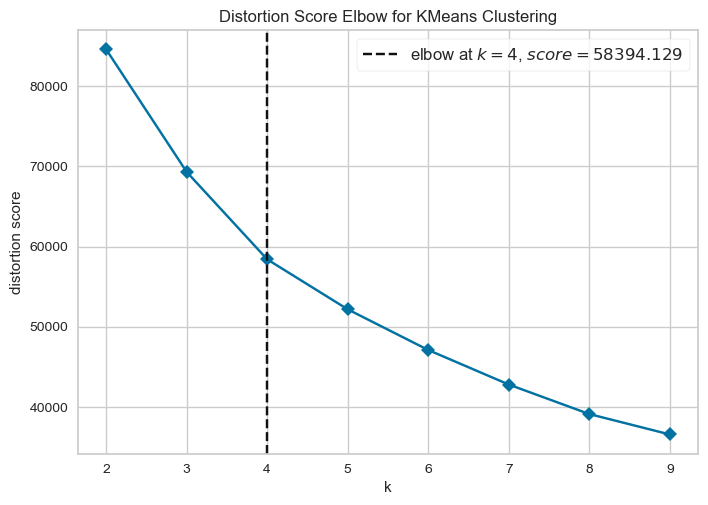

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [296]:
# Menentukan jumlah cluster optimal dengan Elbow Method
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans(n_init=10)
visualizer = KElbowVisualizer(kmeans, k=(2,10), metric='distortion', timings=False)
visualizer.fit(df_selected)
visualizer.show()

In [297]:
# Melatih K-Means dengan k optimal (misal k=4)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df_selected['Cluster_KMeans'] = kmeans.fit_predict(df_selected)

# Evaluasi Silhouette Score
silhouette_kmeans = silhouette_score(df_selected.drop(columns=['Cluster_KMeans']), df_selected['Cluster_KMeans'])
print("Silhouette Score K-Means:", round(silhouette_kmeans, 4))

Silhouette Score K-Means: 0.2413


In [298]:
# Konversi ke numpy array untuk K-Prototypes
X_kproto = df_selected.copy().values

# Menentukan kolom kategorikal (berisi 0 dan 1 saja)
categorical_idx = [i for i, col in enumerate(df_selected.columns) if df_selected[col].nunique() == 2]

# Melatih K-Prototypes
kproto = KPrototypes(n_clusters=4, random_state=42, init='Cao', n_init=5)
df_selected['Cluster_KPrototypes'] = kproto.fit_predict(X_kproto, categorical=categorical_idx)

# Evaluasi Silhouette Score
silhouette_kproto = silhouette_score(df_selected.drop(columns=['Cluster_KPrototypes']), df_selected['Cluster_KPrototypes'])
print("Silhouette Score K-Prototypes:", round(silhouette_kproto, 4))

Silhouette Score K-Prototypes: 0.3509


In [299]:
# Distribusi cluster dari hasil K-Means dan K-Prototypes
print("Cluster_KMeans\n", df_selected['Cluster_KMeans'].value_counts())
print("\nCluster_KPrototypes\n", df_selected['Cluster_KPrototypes'].value_counts())

Cluster_KMeans
 Cluster_KMeans
0    7689
2    7385
1    5492
3    5257
Name: count, dtype: int64

Cluster_KPrototypes
 Cluster_KPrototypes
3    7689
2    7385
0    5492
1    5257
Name: count, dtype: int64


In [300]:
df.columns

Index(['index', 'City', 'Card Type', 'Exp Type', 'Gender', 'Amount', 'Month',
       'DayOfWeek', 'IsWeekend', 'Cluster_KMeans', 'Cluster_KPrototypes'],
      dtype='object')

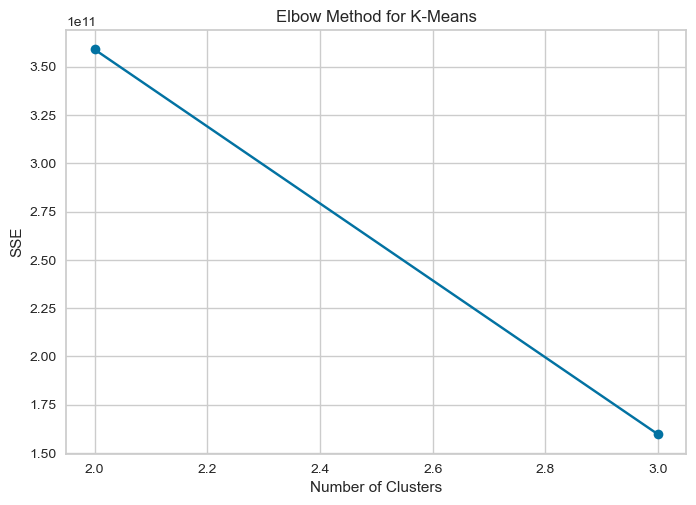

K=2, Silhouette Score=0.6266529645837665
K=3, Silhouette Score=0.5900686037498376
Best K for K-Prototypes: 2 with Silhouette Score: 0.6266529645837665


In [301]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
from sklearn.cluster import KMeans
from kmodes.kprototypes import KPrototypes
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Feature Engineering: Log Transform Amount
df['Log_Amount'] = np.log1p(df['Amount'])

# Feature Engineering: Binning Amount
binning = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
df['Amount_Category'] = binning.fit_transform(df[['Amount']])

# Drop original amount
df.drop(columns=['Amount'], inplace=True)

# Hyperparameter Tuning: Elbow Method for K-Means
sse = []
k_range = range(2, 4)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df.select_dtypes(include=['int64', 'float64']))
    sse.append(kmeans.inertia_)

plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for K-Means')
plt.show()

# Hyperparameter Tuning: K-Prototypes
best_silhouette = -1
best_k = None
for k in k_range:
    kproto = KPrototypes(n_clusters=k, init='Huang', random_state=42, gamma=2)
    clusters = kproto.fit_predict(df, categorical=[1, 2, 3, 4])
    silhouette_avg = silhouette_score(df.select_dtypes(include=['int64', 'float64']), clusters)
    print(f'K={k}, Silhouette Score={silhouette_avg}')
    
    if silhouette_avg > best_silhouette:
        best_silhouette = silhouette_avg
        best_k = k

print(f'Best K for K-Prototypes: {best_k} with Silhouette Score: {best_silhouette}')

### (d). Visualisasi Hasil Clustering

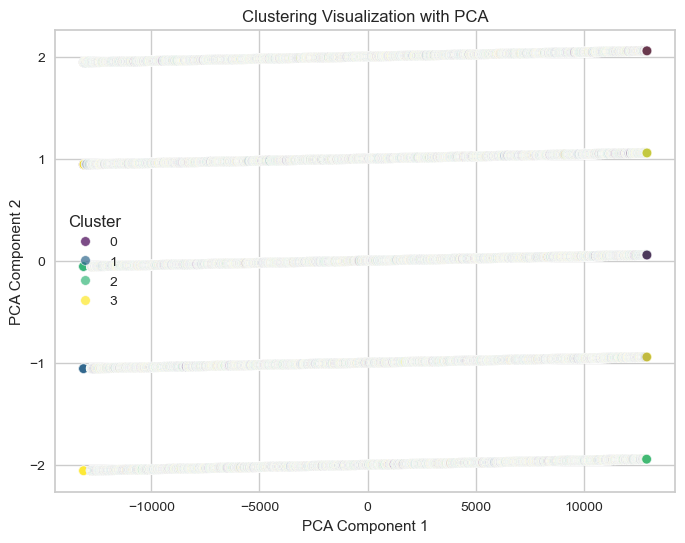

C:\Users\nofen\AppData\Local\Temp\ipykernel_12376\787285304.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Cluster_KMeans'], palette='viridis')


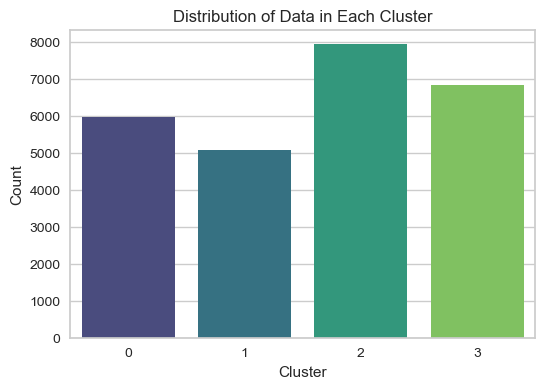

In [303]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Scatter Plot dengan PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_kmeans)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Cluster_KMeans'], palette='viridis', alpha=0.7)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clustering Visualization with PCA')
plt.legend(title='Cluster')
plt.show()

# Bar Chart: Distribusi Data per Cluster
plt.figure(figsize=(6, 4))
sns.countplot(x=df['Cluster_KMeans'], palette='viridis')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Distribution of Data in Each Cluster')
plt.show()

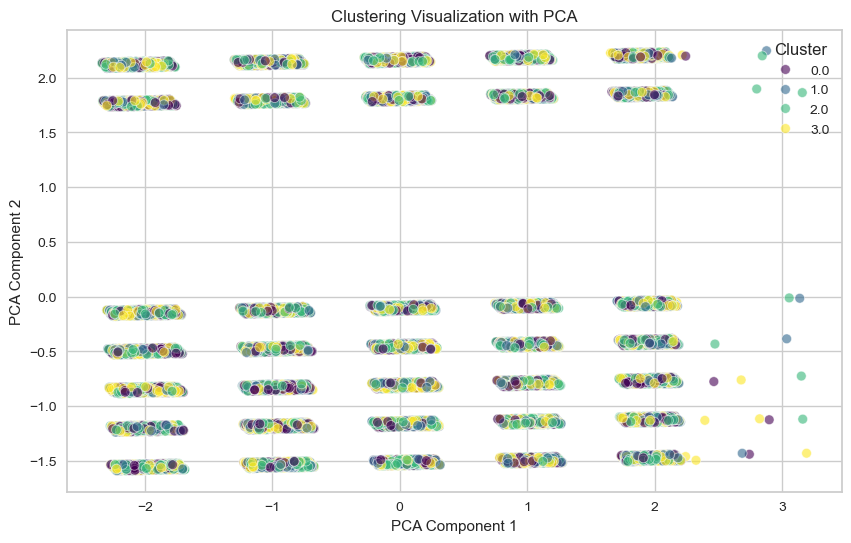

In [304]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Pastikan dataset hanya terdiri dari fitur numerik sebelum PCA
numerical_features = ['Log_Amount', 'Month', 'DayOfWeek', 'IsWeekend', 'Amount_Category']

# Normalisasi data numerik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[numerical_features])

# PCA untuk reduksi dimensi menjadi 2 komponen
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Konversi ke DataFrame untuk visualisasi
df_pca = pd.DataFrame(X_pca, columns=['PCA Component 1', 'PCA Component 2'])
df_pca['Cluster'] = df['Cluster_KMeans']  # Sesuaikan dengan model yang digunakan

# Visualisasi hasil clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PCA Component 1', y='PCA Component 2', hue='Cluster', palette='viridis', alpha=0.6)
plt.title('Clustering Visualization with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

           PCA1      PCA2  Cluster
0 -13139.361572 -1.059125      1.0
1 -13138.361568 -2.060229      3.0
2 -13137.361572 -1.058186      1.0
3 -13136.361577 -0.058536      0.0
4 -13135.361577 -0.056318      2.0


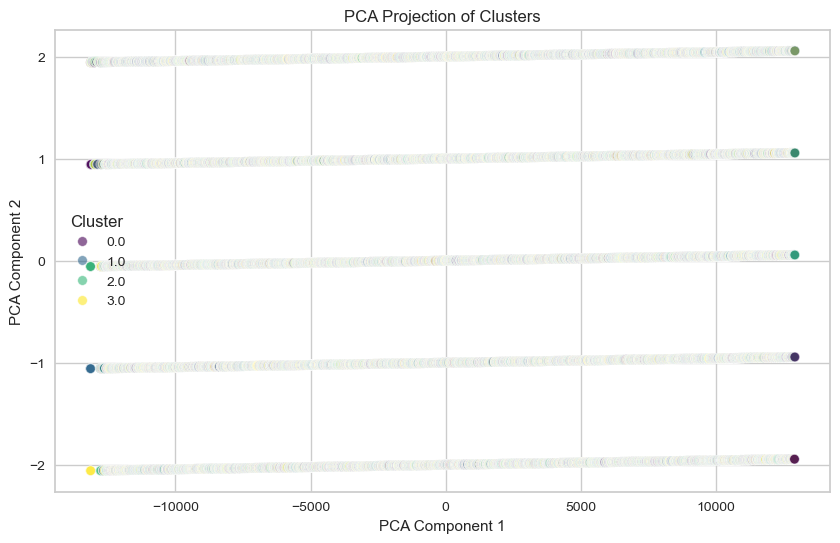

In [305]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Ambil hanya fitur numerik untuk PCA
X_numeric = df.select_dtypes(include=['int64', 'float64'])

# Lakukan reduksi dimensi dengan PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_numeric)

# Buat DataFrame hasil PCA
df_pca = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
df_pca['Cluster'] = df['Cluster_KMeans']  # Ganti sesuai dengan metode clustering yang mau divisualisasi

# Pastikan DataFrame memiliki kolom PCA yang benar
print(df_pca.head())  

# Plot hasil clustering dengan seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', alpha=0.6)
plt.title('PCA Projection of Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title="Cluster")
plt.show()

In [306]:
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Total variance explained: {sum(pca.explained_variance_ratio_)}")

Explained variance ratio: [9.99999964e-01 3.60626616e-08]
Total variance explained: 0.9999999999953904


In [307]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Normalisasi fitur numerik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# Lakukan PCA setelah scaling
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Buat DataFrame hasil PCA
df_pca = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
df_pca['Cluster'] = df['Cluster_KMeans']

# Cek kembali variance ratio
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Total variance explained: {sum(pca.explained_variance_ratio_)}")

Explained variance ratio: [0.65962487 0.332908  ]
Total variance explained: 0.9925328700568166


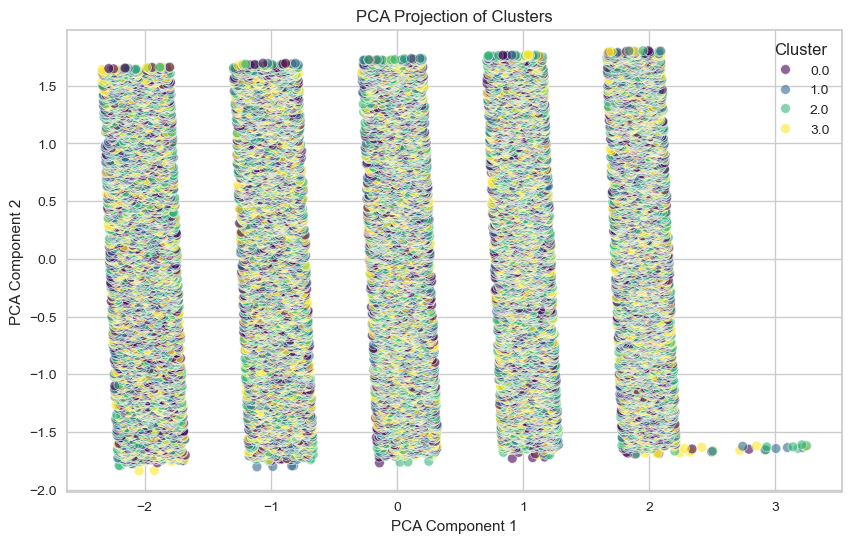

In [308]:
import matplotlib.pyplot as plt
import seaborn as sns

# Buat DataFrame hasil PCA yang sudah distandardisasi
df_pca = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
df_pca['Cluster'] = df['Cluster_KMeans']

# Plot hasil clustering dengan PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', alpha=0.6)
plt.title('PCA Projection of Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title="Cluster")
plt.show()

### e. Analisis dan Interpretasi Hasil Cluster

#### Interpretasi Target

In [311]:
import numpy as np

# Inverse transform Log_Amount ke Amount
df["Amount"] = np.exp(df["Log_Amount"])

# Cek hasil transformasi
df[["Log_Amount", "Amount"]].head()

,Log_Amount,Amount
0,0.078542,1.081709
1,0.031152,1.031643
2,0.096245,1.101029
3,0.115806,1.122778
4,0.157918,1.171070


In [312]:
# Analisis statistik tiap cluster
cluster_summary = df.groupby('Cluster_KMeans').agg({
    'Log_Amount': ['mean', 'median', 'min', 'max'],
    'Amount': ['mean', 'median', 'min', 'max'],
    'City': lambda x: x.value_counts().idxmax(),  # Kota yang paling sering muncul
    'Card Type': lambda x: x.value_counts().idxmax(),  # Jenis kartu paling umum
    'Exp Type': lambda x: x.value_counts().idxmax(),  # Tipe transaksi paling umum
    'Gender': lambda x: x.value_counts().idxmax(),  # Gender terbanyak
    'Month': lambda x: x.value_counts().idxmax(),  # Bulan transaksi terbanyak
    'DayOfWeek': lambda x: x.value_counts().idxmax(),  # Hari transaksi terbanyak
    'IsWeekend': lambda x: x.value_counts().idxmax()  # Apakah lebih banyak terjadi di weekend
}).reset_index()

print(cluster_summary)

  Cluster_KMeans Log_Amount                                  Amount            \
                       mean    median       min       max      mean    median   
0              0   0.138204  0.141572  0.000000  0.373075  1.151502  1.152084   
1              1   0.136846  0.140541  0.000061  0.372065  1.149970  1.150897   
2              2   0.137829  0.142418  0.000013  0.365903  1.151092  1.153058   
3              3   0.137250  0.138806  0.000056  0.369870  1.150484  1.148901   

                          City Card Type Exp Type   Gender    Month DayOfWeek  \
        min       max <lambda>  <lambda> <lambda> <lambda> <lambda>  <lambda>   
0  1.000000  1.452193      126         3        2        0        1         6   
1  1.000061  1.450728       71         3        2        0       12         1   
2  1.000013  1.441816      126         3        2        0        4         3   
3  1.000056  1.447546       71         3        2        0       11         6   

  IsWeekend  
   <lambda> 

# Analisis Karakteristik Cluster dari Model KMeans dan K-Prototypes

## Cluster KMeans

- **Cluster 0**:
  - Rata-rata Log_Amount: 0.138
  - Rata-rata Amount: 1.151
  - Dominan di kota: City 126
  - Mayoritas menggunakan Card Type 3
  - Banyak transaksi terjadi di bulan 1 dan hari ke-6
  - Mayoritas terjadi di akhir pekan
  - **Interpretasi**: Cluster ini kemungkinan terdiri dari pengguna kartu dengan transaksi menengah yang sering berbelanja di akhir pekan.

- **Cluster 1**:
  - Rata-rata Log_Amount: 0.137
  - Rata-rata Amount: 1.149
  - Dominan di kota: City 71
  - Mayoritas menggunakan Card Type 3
  - Banyak transaksi terjadi di bulan 12 dan hari ke-1
  - Mayoritas terjadi di hari kerja
  - **Interpretasi**: Cluster ini bisa mencerminkan pelanggan dengan transaksi stabil yang lebih aktif di hari kerja.

- **Cluster 2**:
  - Rata-rata Log_Amount: 0.138
  - Rata-rata Amount: 1.151
  - Dominan di kota: City 126
  - Mayoritas menggunakan Card Type 3
  - Banyak transaksi terjadi di bulan 4 dan hari ke-3
  - Mayoritas terjadi di hari kerja
  - **Interpretasi**: Cluster ini terdiri dari pelanggan dengan kebiasaan transaksi tinggi di hari kerja, kemungkinan profesional atau bisnis.

- **Cluster 3**:
  - Rata-rata Log_Amount: 0.137
  - Rata-rata Amount: 1.150
  - Dominan di kota: City 71
  - Mayoritas menggunakan Card Type 3
  - Banyak transaksi terjadi di bulan 11 dan hari ke-6
  - Mayoritas terjadi di akhir pekan
  - **Interpretasi**: Cluster ini mencakup pengguna dengan transaksi tinggi di akhir pekan, mungkin pelanggan rekreasional.

## Cluster K-Prototypes

- **Cluster 0**:
  - Memiliki pola transaksi mirip dengan Cluster 0 di KMeans
  - Perbedaan utama ada pada pola penggunaan jenis kartu
  - **Interpretasi**: Menegaskan bahwa pelanggan dalam cluster ini aktif di akhir pekan dan memiliki preferensi tertentu terhadap kartu yang digunakan.

- **Cluster 1**:
  - Menunjukkan distribusi transaksi yang mirip dengan Cluster 1 KMeans
  - Namun, lebih tersebar pada berbagai bulan
  - **Interpretasi**: Pelanggan dalam cluster ini lebih merata dalam pola pembelian sepanjang tahun.

- **Cluster 2**:
  - Lebih banyak transaksi terjadi di hari kerja
  - Memiliki preferensi yang lebih spesifik pada kota tertentu
  - **Interpretasi**: Kelompok pelanggan ini lebih stabil dalam bertransaksi dan mungkin merupakan segmen bisnis.

- **Cluster 3**:
  - Mirip dengan Cluster 3 di KMeans, tetapi ada perbedaan dalam distribusi hari transaksi
  - **Interpretasi**: Bisa jadi pelanggan dengan kebiasaan transaksi yang lebih fleksibel, tidak hanya di akhir pekan.

## Perbandingan KMeans vs K-Prototypes

- Kedua metode menghasilkan pola cluster yang mirip, namun K-Prototypes menangkap lebih banyak variasi dari fitur kategorikal.
- KMeans lebih terfokus pada pola transaksi berdasarkan nilai jumlah transaksi.
- K-Prototypes lebih baik dalam mengelompokkan pelanggan berdasarkan jenis kartu dan pola transaksi di kota tertentu.
- Jika ingin analisis berbasis angka yang lebih kuat, KMeans lebih cocok. Jika ingin mempertimbangkan aspek kategori lebih dalam, K-Prototypes lebih baik.

### Kesimpulan
Pemilihan metode clustering bergantung pada tujuan analisis. Jika tujuan utama adalah memahami pola pengeluaran berdasarkan jumlah transaksi, KMeans cukup. Namun, jika ingin mempertimbangkan elemen kategorikal seperti jenis kartu dan lokasi transaksi, K-Prototypes memberikan wawasan tambahan.


### 7. Mengeksport Data

In [ ]:
# Simpan hasil clustering ke dalam dataset asli
df_original = df.copy()
df_original['Cluster_KMeans'] = df['Cluster_KMeans']

# Simpan ke file CSV
df_original.to_csv('Data_clustering.csv', index=False)

print("File CSV berhasil disimpan sebagai 'Data_clustering.csv'")